# Read and Filter FDS Simulation Results

In [1]:
import fdsreader as fds
from fdsreader.pl3d import pl3d

sim = fds.Simulation(r'euler/fds/100/100')
#print(sim.meshes, sim.surfaces, sim.data_3d, sim.smoke_3d, sim.isosurfaces, sim.particles, sim.obstructions)



## Heat Release Rate - Visualization

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


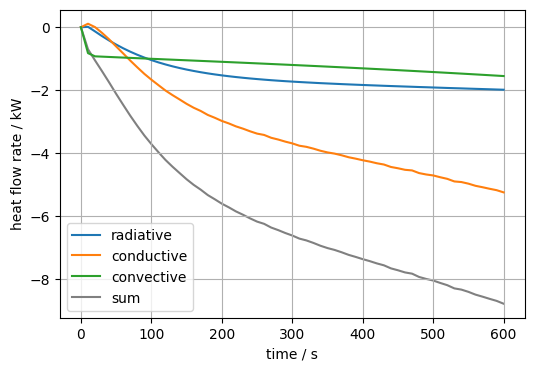

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

from IPython.display import display
from PIL import Image

sim = fds.Simulation(r'euler/fds/1760/1760')
delta_qtot = (sim.hrr['Q_TOTAL'])

plt.plot(sim.hrr['Time'], sim.hrr['Q_RADI'], label='radiative')
plt.plot(sim.hrr['Time'], sim.hrr['Q_COND'], label='conductive')
plt.plot(sim.hrr['Time'], sim.hrr['Q_CONV'], label='convective')

plt.plot(sim.hrr['Time'], 
         sim.hrr['HRR'] + sim.hrr['Q_RADI'] + sim.hrr['Q_COND'] + sim.hrr['Q_CONV'], 
         color='grey', label='sum', zorder=0)

plt.xlabel('time / s')
plt.ylabel('heat flow rate / kW')
plt.legend()

plt.grid()

# save output to file
plt.figure()
plt.close()

## Convergence Check - Heat Release Rate

IndexError: list index out of range

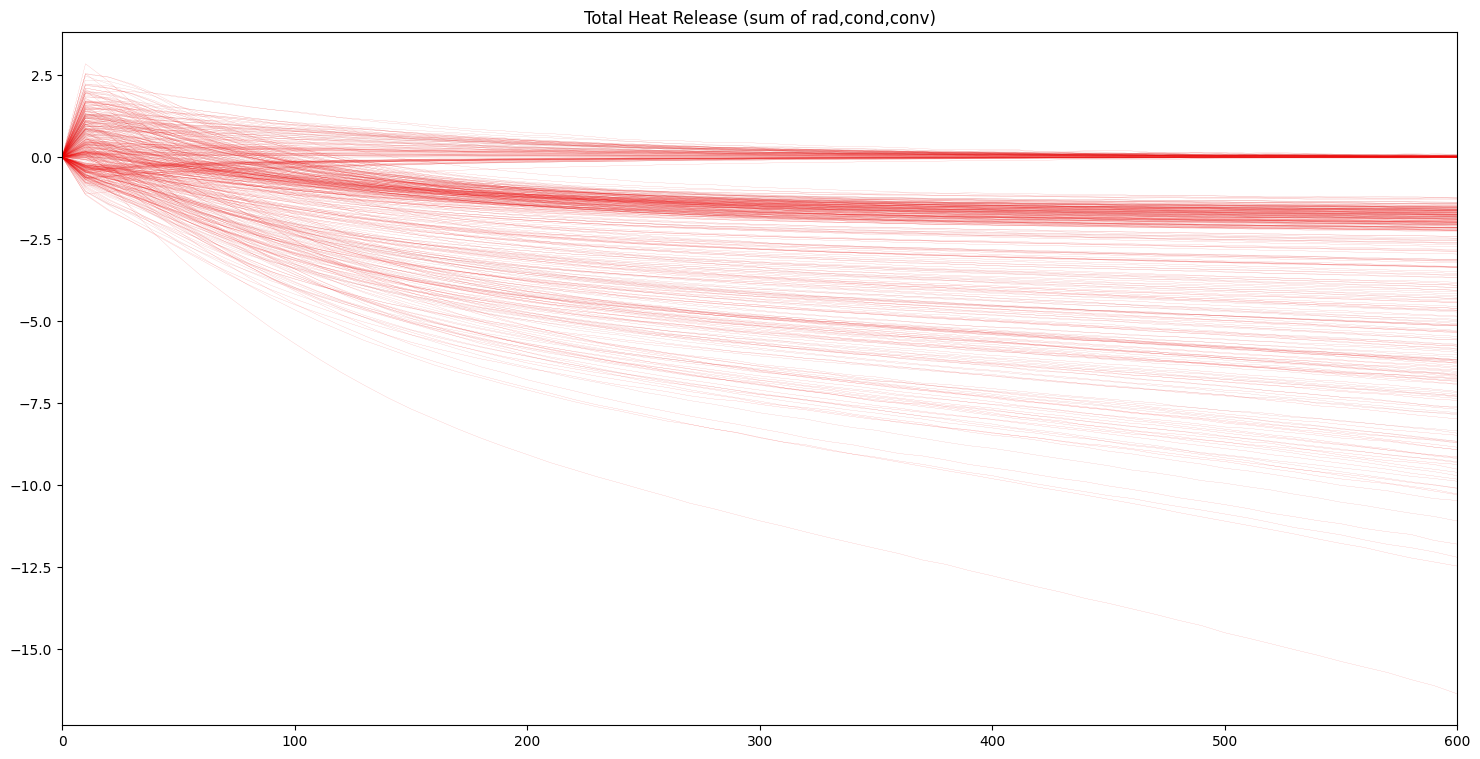

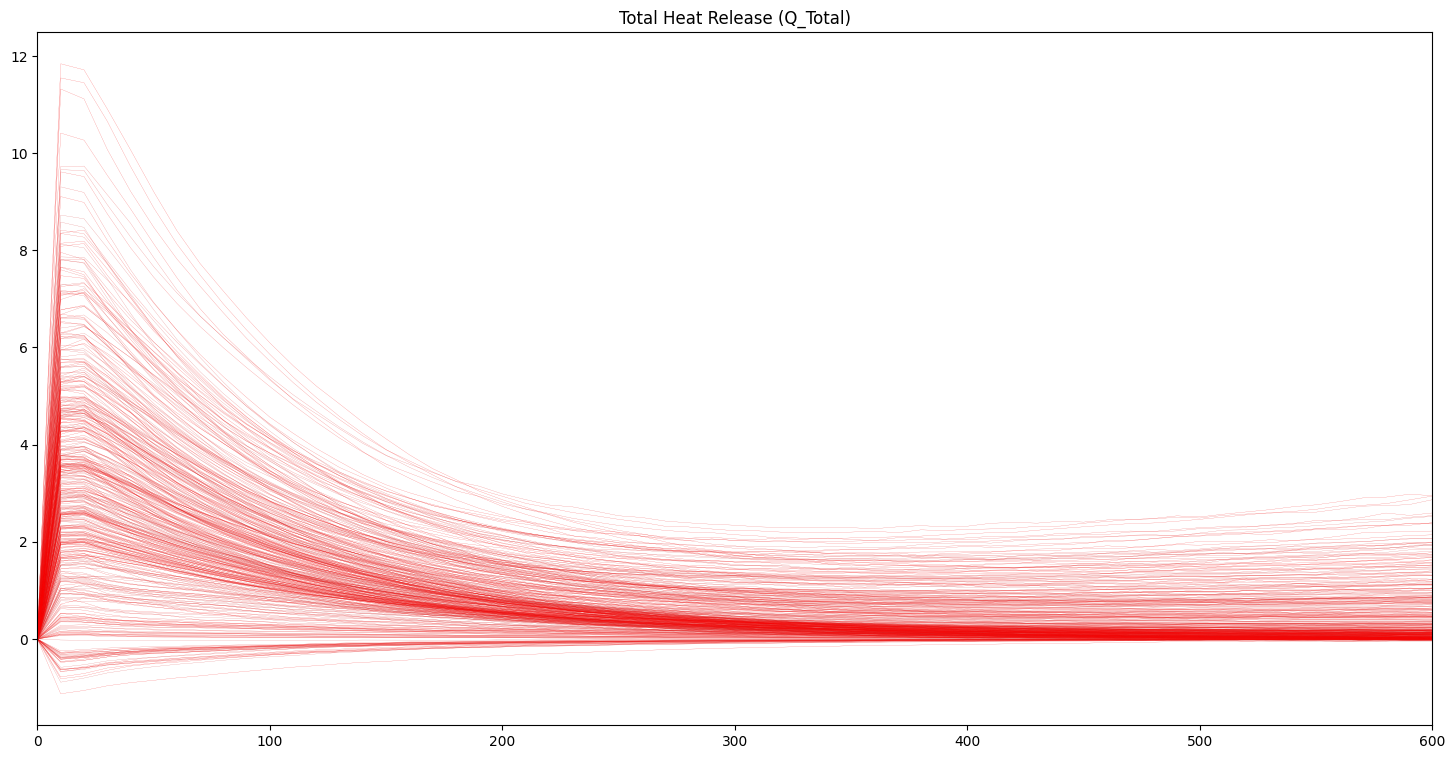

<Figure size 1200x600 with 0 Axes>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

from IPython.display import display
from PIL import Image

qtot = []
delta_qtot = []
delta_qerr = []
runs = 2000 #number of simulations to evaluate
runs_list = [] #empty list to be filled with valid cases
hrr = []
outliers = []

for p in range(runs): #add all cases
    sim = fds.Simulation(r'euler/fds/'+str(p)+'/'+str(p)) #define fds simulation
    hrr.append(sim.hrr['Q_TOTAL'][60])
    if sim.hrr['Q_TOTAL'][60] < 3: #remove degenerate cases, threshold for hrr q_tot (3 kW works quite well)
        runs_list.append(int(p))
    else:
        outliers.append(int(p))

plt.figure(figsize=(18,9))
for i in runs_list:
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    qtot.append(sim.hrr['Q_TOTAL'])

    #plt.plot(sim.hrr['Time'],sim.hrr['Q_TOTAL'],label=str(i))
    plt.title('Total Heat Release (sum of rad,cond,conv)')
    plt.xlim(0,600)
    plt.plot(sim.hrr['Time'],sim.hrr['Q_RADI'] + sim.hrr['Q_COND'] + sim.hrr['Q_CONV'],label=str(i),color=(i/runs,1-i/runs,1-i/runs),alpha=0.6,linewidth=0.1)
plt.savefig('hrrsum.png',dpi=300)

plt.figure(figsize=(18,9))
for i in runs_list:
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    qtot.append(sim.hrr['Q_TOTAL'])

    #plt.plot(sim.hrr['Time'],sim.hrr['Q_TOTAL'],label=str(i))
    plt.title('Total Heat Release (Q_Total)')
    plt.xlim(0,600)
    plt.plot(sim.hrr['Time'],sim.hrr['Q_TOTAL'],label=str(i),color=(i/runs,1-i/runs,1-i/runs),alpha=1,linewidth=0.1)

plt.savefig('hrrqtot.png',dpi=300)

#Mean Squared and Absolute Errors by Simulation Time
for j in qtot:
    average = (sum(j)/len(j))
    for k in range(61):
        delta_qtot.append(abs((j[k]-average)**2/average/len(j)))
        delta_qerr.append(abs((j[k]-average)/average/len(j)))

plt.figure(figsize=(12,6))
time = []
mavg2 = []  
merr2 = []
for m in range(61):
    time.append((m)*len(runs_list))
    mavg = []
    merr = []
    for n in runs_list:
        mavg.append((delta_qtot[(n*61)+m])/len(runs_list)) #61 timesteps in total, depends on simulation setup
        merr.append((delta_qerr[(n*61)+m])/len(runs_list))
    mavg2.append(sum(mavg))
    merr2.append(sum(merr))

plt.figure()
plt.plot(sim.hrr['Time'], sim.hrr['Q_RADI'], label='radiative')
plt.plot(sim.hrr['Time'], sim.hrr['Q_COND'], label='conductive')
plt.plot(sim.hrr['Time'], sim.hrr['Q_CONV'], label='convective')
plt.plot(sim.hrr['Time'], sim.hrr['MLR_AIR'], label='mlr_air') #air mass loss rate

plt.plot(sim.hrr['Time'], 
         sim.hrr['HRR'] + sim.hrr['Q_RADI'] + sim.hrr['Q_COND'] + sim.hrr['Q_CONV'], 
         color='grey', label='sum', zorder=0)

plt.xlabel('time / s')
plt.ylabel('heat flow rate / kW')
plt.legend()

plt.grid()

### Plot Air Mass Loss Rate

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


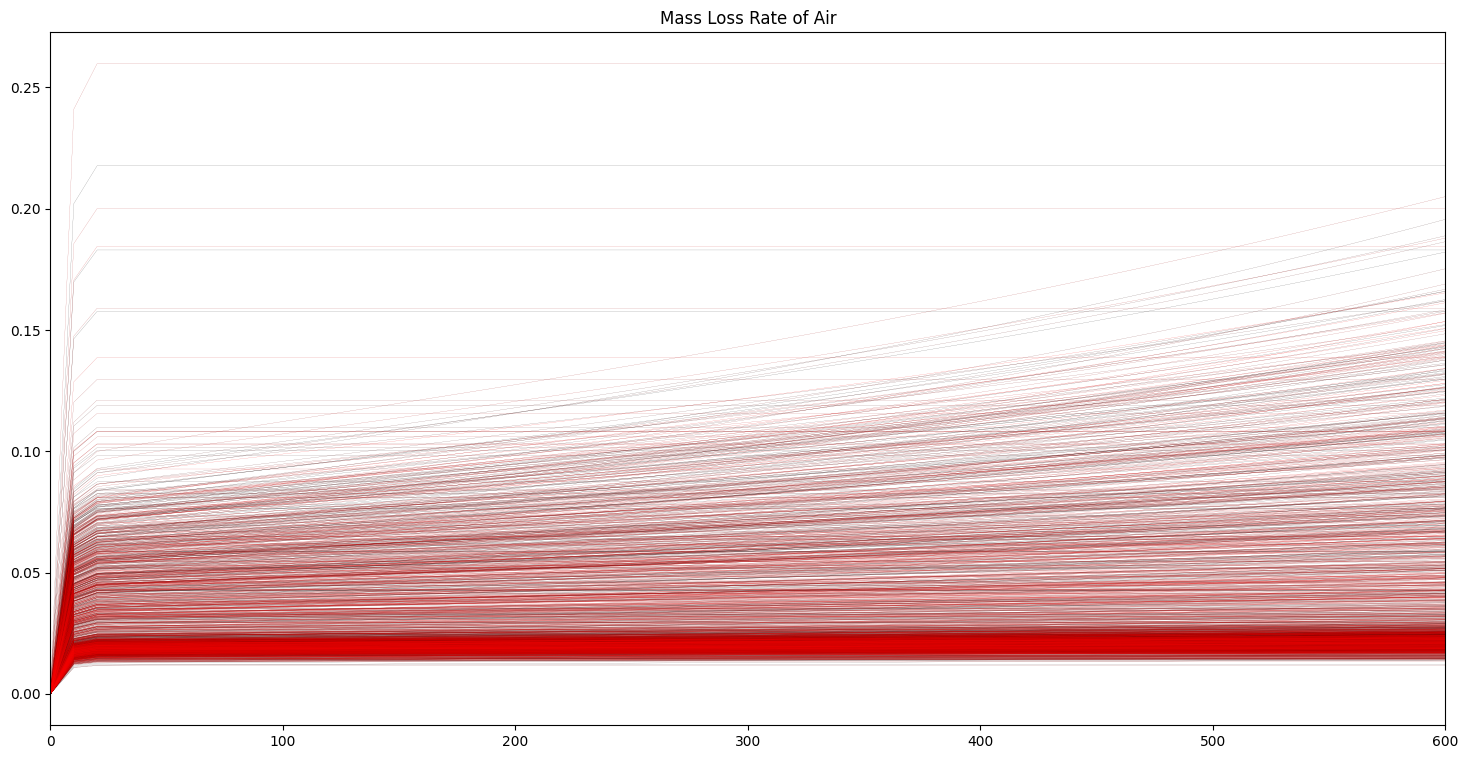

In [128]:
plt.figure(figsize=(18,9))
for i in runs_list:
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    qtot.append(sim.hrr['Q_TOTAL'])

    #plt.plot(sim.hrr['Time'],sim.hrr['Q_TOTAL'],label=str(i))
    plt.title('Mass Loss Rate of Air')
    plt.xlim(0,600)
    plt.plot(sim.hrr['Time'],sim.hrr['MLR_AIR'],color=(i/runs,0,0),alpha=0.8,linewidth=0.1)
plt.savefig('mlr.png',dpi=300)

## Normalized Mean Squared Error

Excluded: 46
Excluded: 239
Excluded: 1254
Excluded: 1879


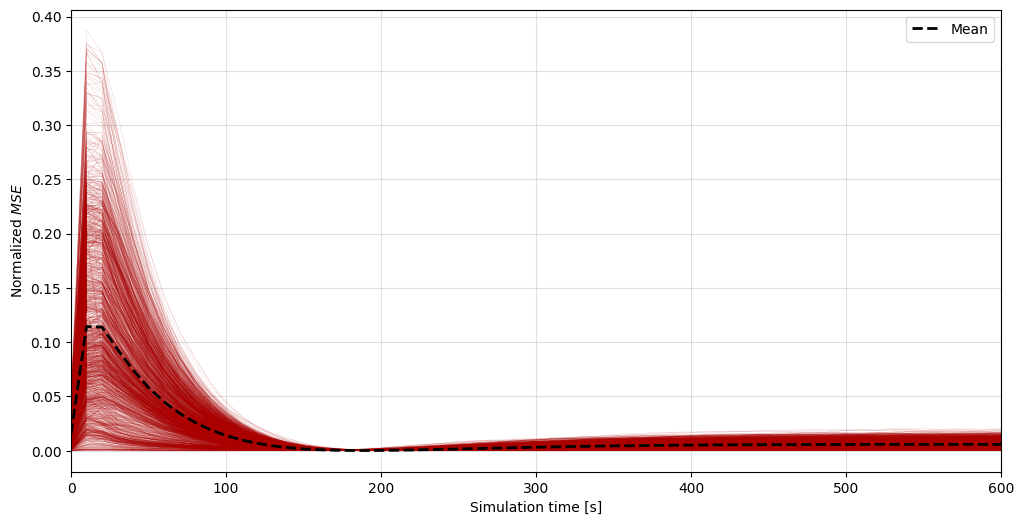

In [26]:
plt.figure(figsize=(12,6))
for l in runs_list: #each item
    delta = delta_qtot[l*61:(l+1)*61]
    plt.ylabel('Normalized $MSE$')
    plt.xlabel('Simulation time [s]')
    plt.xlim(0,600)
    plt.grid(alpha=0.4)
    if max(delta) < 0.4: #remove if NMSE at any point exceeds the threshold
        plt.plot(sim.hrr['Time'],delta,color='#AA0000',alpha=0.3,linewidth=0.2)
    else:
        print('Excluded: '+str(l))
plt.plot(sim.hrr['Time'],mavg2,'--',color='black',linewidth=2, label='Mean') #moving average
plt.legend()
plt.savefig('ms_error.png',dpi=300)

## Normalized Mean Absolute Error

Excluded: 0
Excluded: 29
Excluded: 408
Excluded: 452
Excluded: 931
Excluded: 1185
Excluded: 1238
Excluded: 1247
Excluded: 1507
Excluded: 1833
Excluded: 1862


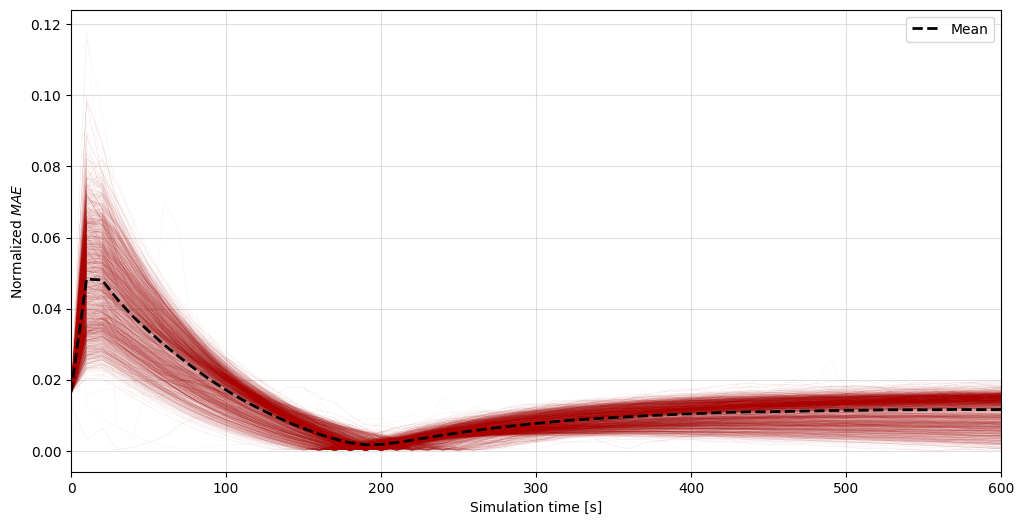

In [27]:
plt.figure(figsize=(12,6))
for n in runs_list: #each item
    delta = delta_qerr[n*61:(n+1)*61]
    plt.ylabel('Normalized $MAE$')
    plt.xlabel('Simulation time [s]')
    plt.xlim(0,600)
    plt.grid(alpha=0.4)
    if max(delta) < 0.12: #Remove if NMAE at any point exceeds 0.12
        plt.plot(sim.hrr['Time'],delta,color='#AA0000',alpha=0.1,linewidth=0.2)
    else:
        print('Excluded: '+str(n))
plt.plot(sim.hrr['Time'],merr2,'--',color='black',linewidth=2, label='Mean') #expected minimum at 1/3 of the duration, rises slightly after
plt.legend()
plt.savefig('ma_error.png',dpi=300)

### Check Slice File Outputs (for processing only)

Slice Type [2D/3D]: 3D
  Quantity: VELOCITY
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Slice Type [2D/3D]: 3D
  Quantity: TEMPERATURE
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Slice Type [2D/3D]: 3D
  Quantity: PRESSURE
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Slice Type [2D/3D]: 3D
  Quantity: U-VELOCITY
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Slice Type [2D/3D]: 3D
  Quantity: V-VELOCITY
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Slice Type [2D/3D]: 3D
  Quantity: W-VELOCITY
  Physical Extent: Extent([0.00, 4.90] x [0.00, 4.90] x [0.00, 2.80])
  Orientation [1/2/3]: 0

Simulation(chid=904,
           meshes=1,
           obstructions=16,
           slices=6,
           data_3d=5)
SliceCollection([Slice([3D] quantity=Q

TypeError: Invalid shape (50, 50, 28) for image data

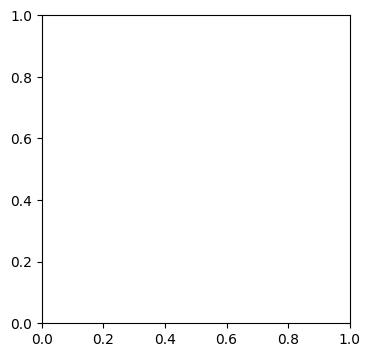

In [104]:
# print available slice data
for slice in sim.slices:
    print(f"Slice Type [2D/3D]: {slice.type}\n  Quantity: {slice.quantity.name}\n", 
          f" Physical Extent: {slice.extent}\n  Orientation [1/2/3]: {slice.orientation}\n")
print(sim)
# get the W-VELOCITY slice(s)
u_slice = sim.slices.filter_by_quantity("U-VELOCITY")
v_slice = sim.slices.filter_by_quantity("V-VELOCITY")
w_slice = sim.slices.filter_by_quantity("W-VELOCITY")
print(u_slice)
print(v_slice)
print(w_slice)

# select slice, by its distance to a given point
slc = w_slice.get_nearest(x=1, z=2)
print(slc)

# choose and output the time step, next to t=75 s
#it = slc.get_nearest_timestep(25)
#print(f"Time step: {it}")
#print(f"Simulation time: {slc.times[it]}")

# choose the temperature slice in y-direction
slc = sim.slices.filter_by_quantity('TEMPERATURE').get_nearest(x=2, y=0)
print(slc)
# only one mesh
slc_data = slc[0].data
print(slc_data)

# Initial visualasation of the data at time t=50 s
it = slc.get_nearest_timestep(50)
plt.imshow(slc_data[it]);

# save output to file
plt.figure()
plt.close()

# Access the transpose data using ndarray.T and set the origin of the output
plt.imshow(slc_data[it].T, origin='lower');

# save output to file
plt.figure()
plt.close()

### Plot temperature at the center of room at a given time

20.771957
22.122904
36.493984
39.75526
36.788086
31.692377
34.399445
41.307682
34.768463
18.92883
32.97946
26.20336
35.099262
25.632156
30.930908
27.777658
25.335382
22.498304
21.574047
28.45266
28.683908
30.446554
29.675755
34.734917
26.387663
39.880108
36.178608
26.979158
37.426556
17.919504
22.59041
21.881247
24.137775
38.249424
29.801418
30.906326
28.360147
31.729887
21.976877
22.058834
26.60734
20.70725
28.200085
39.159077
23.595045
30.252857
24.641006
30.955194
18.011236
36.21224
33.059906
18.837893
31.130632
34.594505
26.795034
33.37083
35.246834
25.194975
32.602028
37.736897
29.528786
37.89458
21.158401
35.855553
27.875221
20.794538
36.884556
26.411642
35.87204
33.38873
28.096378
32.13213
31.093533
26.683151
28.108799
37.164658
26.492558
28.690195
34.95969
29.61938
21.70724
33.64795
32.536396
39.686123
36.075672
25.72733
21.091476
25.173811
30.585228
38.307697
18.59211
27.25876
17.59444
26.537764
22.802729
33.042683
28.960333
28.816584
17.424814
35.235382
18.726002
25.017689
29

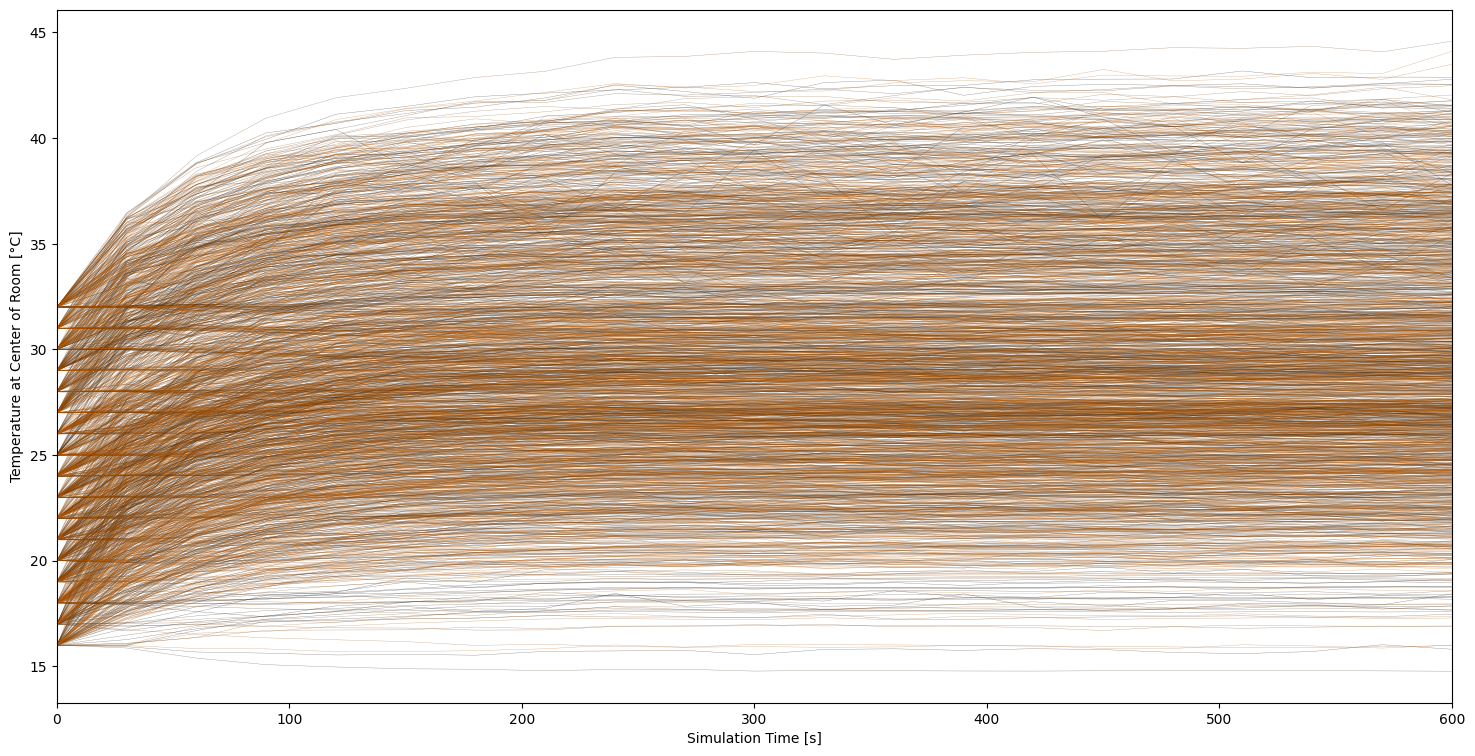

In [3]:
res = 1200
runs = 2000
plt.figure(figsize=(18,9))
plt.xlim(0,600)
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30i = []
for i in runs_list:
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    xmid = max(sim.meshes[0][0])/2 #sim.meshes[mesh: 0 if one room][0:x-direction,1:y-direction,2:z-direction]
    ymid = max(sim.meshes[0][1])/2
    xmidint = int(xmid*10) #get the barycenter of the room in terms of x,y,z
    ymidint = int(ymid*10)
    zmid = max(sim.meshes[0][2])/2
    zmidint = int(zmid*10)
    #slc = (sim.slices.filter_by_quantity('TEMPERATURE').get_nearest(x=xmid, y=ymid))
    #select slice, location and time
    ## slice 0: 3D velocity
    ## slice 1: temperature
    ## slice 2: pressure
    ## slice 3: u-velocity
    ## slice 4: v-velocity
    ## slice 5: w-velocity
    temps_30i.append((sim.slices[1][0].data[0,xmidint,ymidint,zmidint])) #sim.slices[quantity][mesh: 0 if one room].data[timestep,x,y,z]
    temps_30f.append((sim.slices[1][0].data[20,xmidint,ymidint,zmidint]))
    temps = []
    times = []
    for j in range(21):
        #print(sim.slices[1][0].data[j,xmidint,ymidint,zmidint])
        temps.append((sim.slices[1][0].data[j,xmidint,ymidint,zmidint])) #temp. data at center of room at t (intervals of specified resolution)
        times.append(j*30) #confirm timesteps with the simulation input file
    #print(sum(temps)/21)
    plt.plot(times,temps,label=str(i),color=((i/max(runs_list))/1.2,(i/max(runs_list))/2.5,0),alpha=0.5,linewidth=0.25)
plt.savefig('temp_center.png',dpi=300)

### Plot Temperature Distribution at Center of Room (not used)

OSError: The given path does neither point to a directory nor a file: euler/fds/2000/2000

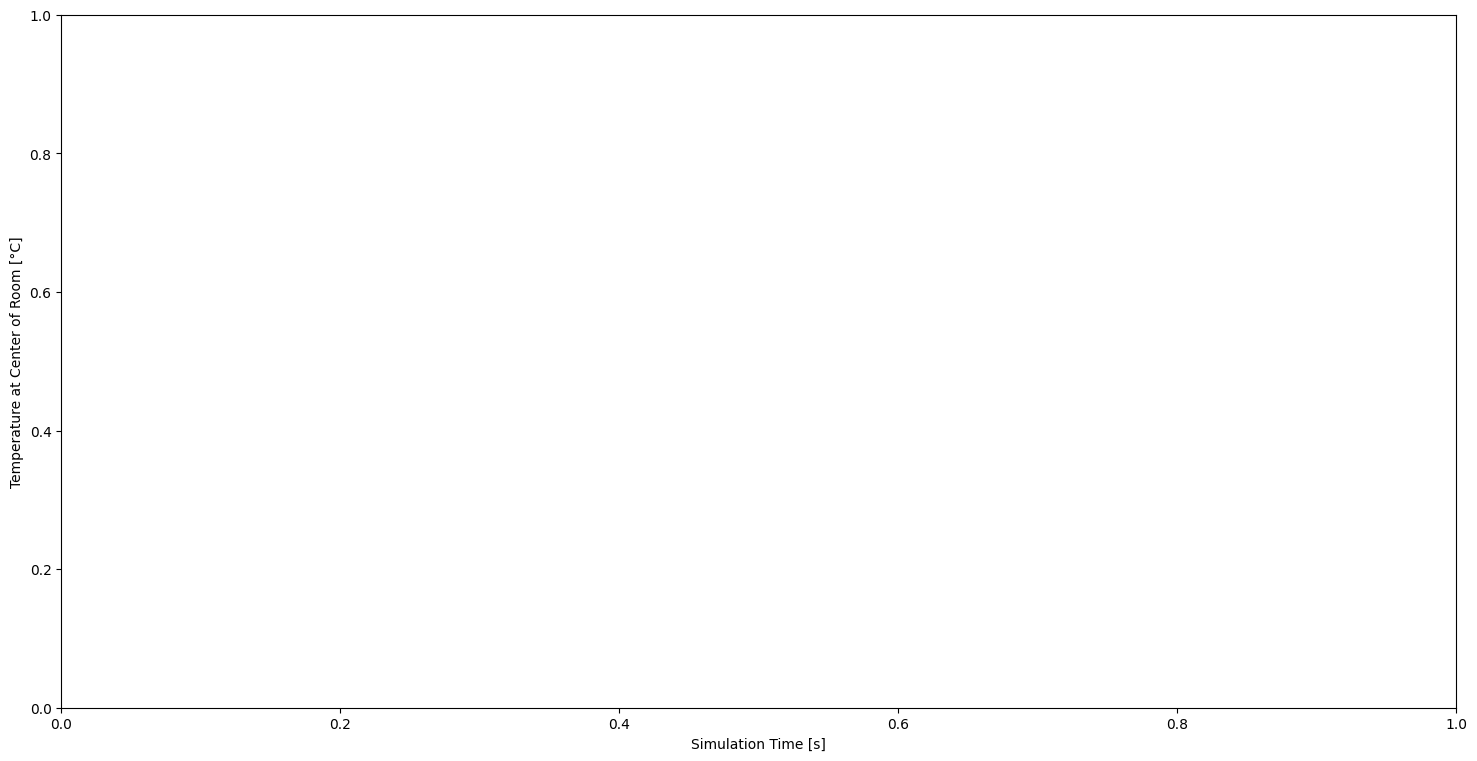

In [13]:
#temperature distribution at t: {0,500,600}
res = 1200
runs = 2000
plt.figure(figsize=(18,9))
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30m = []
temps_30i = []
tempgrad_i = []
tempgrad_m = []
tempgrad_f = []
temph_i = []
temph_m = []
temph_f = []
for k in range(28): #up to 2.8 m in height
    for i in runs_list:
        sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
        xmid = max(sim.meshes[0][0])
        ymid = max(sim.meshes[0][1])
        xint = int(xmid*10)
        yint = int(ymid*10)
        zmid = max(sim.meshes[0][2])
        zmidint = int(zmid*10)

        for l in range(ymidint):
            for m in range(xmidint):
                temps_30i.append((sim.slices[1][0].data[0,m,l,k]))
                temps_30m.append((sim.slices[1][0].data[8,m,l,k]))
                temps_30f.append((sim.slices[1][0].data[20,m,l,k]))
        tempgrad_i.append(sum(temps_30i)/len(temps_30i))
        tempgrad_m.append(sum(temps_30m)/len(temps_30m))
        tempgrad_f.append(sum(temps_30f)/len(temps_30f))
        temps_30i = []
        temps_30m = []
        temps_30f = []
    temph_i.append(sum(tempgrad_i)/len(tempgrad_i))
    temph_m.append(sum(tempgrad_m)/len(tempgrad_m))
    temph_f.append(sum(tempgrad_f)/len(tempgrad_f))
    tempgrad_i = []
    tempgrad_m = []
    tempgrad_f = []
plt.plot(temph_i,label=str(i),color=((i/max(runs_list))/1.2,(i/max(runs_list))/2.5,0),alpha=0.5,linewidth=0.25)
plt.savefig('temp_center.png',dpi=300)

### Temperature Distribution by Time

KeyboardInterrupt: 

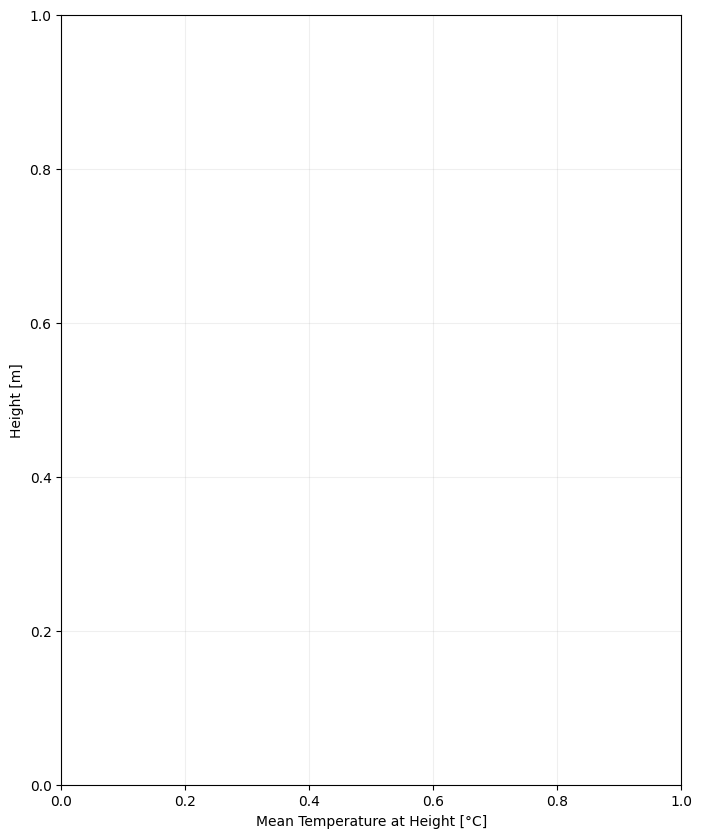

In [57]:
#temperature distrubution at each timestep
##averages all simulations based and aggregates mean temperature by height, may take a very long time!

heights = []
for h in range(28):
    heights.append(h/10)

plt.figure(figsize=(8,10))
plt.xlabel('Mean Temperature at Height [°C]')
plt.grid(alpha=0.2)
plt.ylabel('Height [m]')

for b in range(21): #number of timesteps
    temps = []
    tempgrad = []
    temph = []
    for k in range(28): #height
        for i in runs_list:
            sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
            xmid = max(sim.meshes[0][0])
            ymid = max(sim.meshes[0][1])
            xint = int(xmid*10)
            yint = int(ymid*10)
            zmid = max(sim.meshes[0][2])
            zmidint = int(zmid*10)

            for l in range(ymidint):
                for m in range(xmidint):
                    temps.append((sim.slices[1][0].data[b,m,l,k]))
            tempgrad.append(sum(temps)/len(temps))
            temps = []
        temph.append(sum(tempgrad)/len(tempgrad))
        tempgrad = []
    plt.plot(temph,heights,label='Timestep: '+str(b),color=(b/21,b/63,0),alpha=0.5,linewidth=1.5)
plt.savefig('temp_strat_time.png',dpi=300)

## Import Dataframe to Aggregate Results by Case

In [183]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'fds_data_summary_with_vent_type.csv')

#print(data.head())

   CHID        Vent Type  TMPA  Floor Heating  Radiator  Supply TMP_FRONT  \
0  1069            Swirl  16.0           True     False              35.0   
1  1855  Louvered Square  25.0           True     False              25.0   
2   797            Swirl  18.0          False      True              18.0   
3  2288  Louvered Square  18.0          False     False              35.0   
4   909           Linear  21.0          False     False              35.0   

   Wall TMP_FRONT Room Dimensions (x,y,z) Case Type Heating System  
0             NaN         (5.3, 4.4, 2.7)   Heating  Floor Heating  
1             NaN         (4.6, 5.8, 2.8)   Heating  Floor Heating  
2             NaN         (4.0, 5.2, 2.8)   Heating       Radiator  
3             NaN         (5.2, 5.5, 2.8)   Heating     Forced Air  
4             NaN         (4.6, 4.5, 2.7)   Heating     Forced Air  


### Plot Temperature Distribution

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


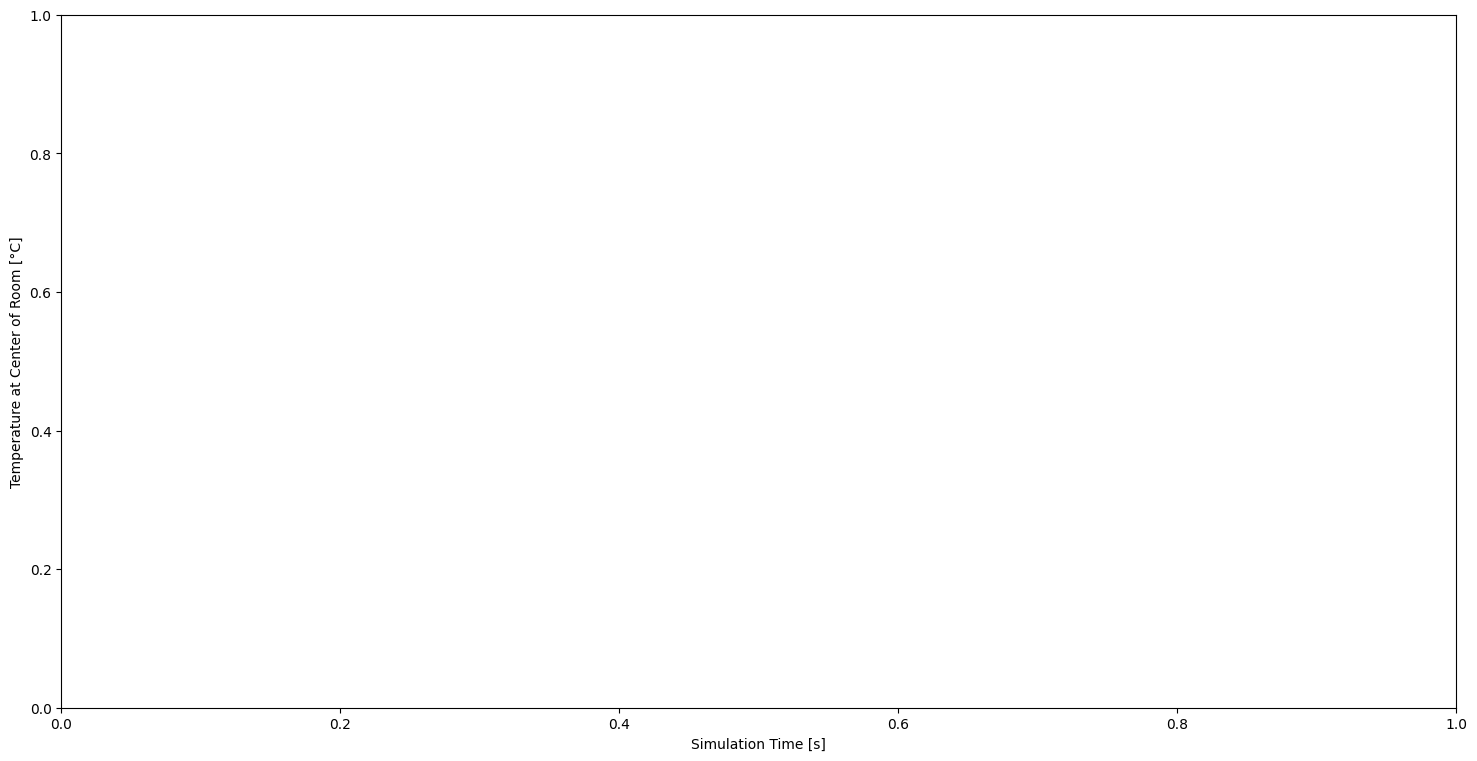

In [188]:
#temperature distribution at t: {0,300,600}: by case
res = 1200
runs = 2000
plt.figure(figsize=(18,9))
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30m = []
temps_30i = []
tempgrad_i = []
tempgrad_m = []
tempgrad_f = []

##define list for each attribute (process not automated yet :/)
#temph_i = []
#temph_m = []
#temph_f = []

#temph_i_ls = []
#temph_m_ls = []
#temph_f_ls = []
temph_i_c = []
#temph_i_v = []
temph_m_c = []
#temph_m_v = []
temph_f_c = []
#temph_f_v = []
for k in range(28):
    for i in runs_list:
        row = data[data['CHID']==i]
        case = row['Vent Type'].iloc[0]
        if case == 'Swirl':
            sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
        else:
            continue
        xmid = max(sim.meshes[0][0])
        ymid = max(sim.meshes[0][1])
        xint = int(xmid*10)
        yint = int(ymid*10)
        zmid = max(sim.meshes[0][2])
        zmidint = int(zmid*10)

        for l in range(ymidint):
            for m in range(xmidint):
                temps_30i.append((sim.slices[1][0].data[0,m,l,k]))
                temps_30m.append((sim.slices[1][0].data[5,m,l,k]))
                temps_30f.append((sim.slices[1][0].data[20,m,l,k]))
        tempgrad_i.append(sum(temps_30i)/len(temps_30i))
        tempgrad_m.append(sum(temps_30m)/len(temps_30m))
        tempgrad_f.append(sum(temps_30f)/len(temps_30f))
        temps_30i = []
        temps_30m = []
        temps_30f = []
    temph_i_c.append(sum(tempgrad_i)/len(tempgrad_i))
    temph_m_c.append(sum(tempgrad_m)/len(tempgrad_m))
    temph_f_c.append(sum(tempgrad_f)/len(tempgrad_f))
    tempgrad_i = []
    tempgrad_m = []
    tempgrad_f = []
#plt.plot(temph_i,label=str(i),color=((i/max(runs_list))/1.2,(i/max(runs_list))/2.5,0),alpha=0.5,linewidth=0.25)
#plt.savefig('temp_center_heating.png',dpi=300)

### Plot Temperature Distribution by Case

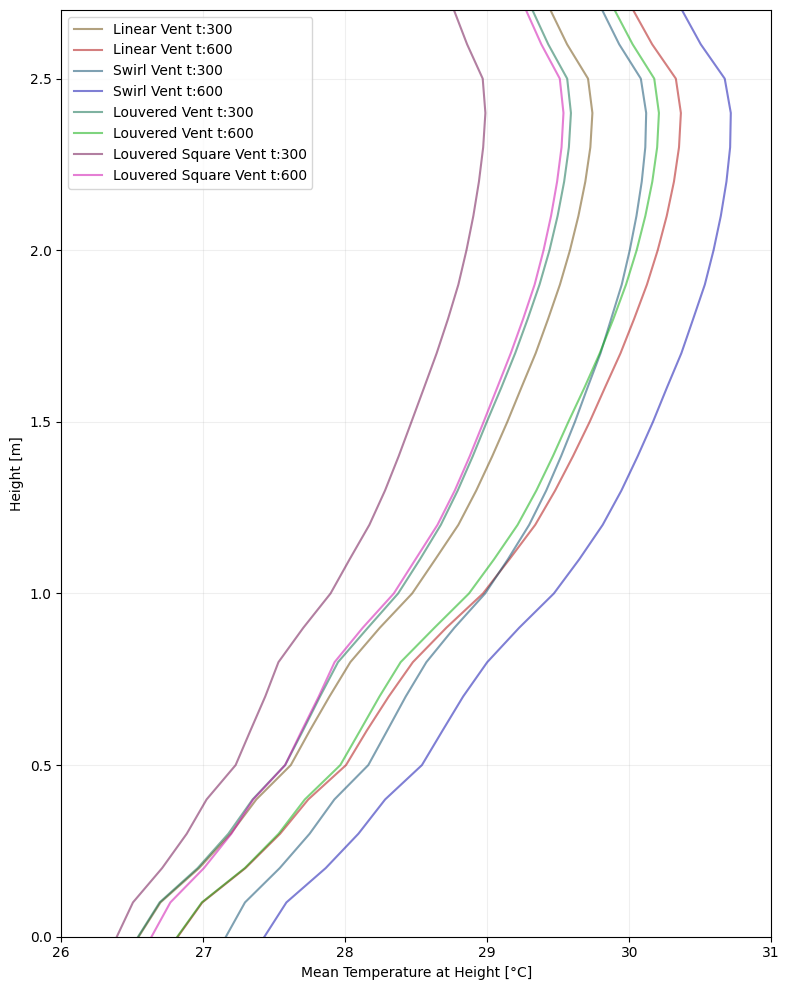

In [194]:
#Before plotting, check the lists for attributes; since this process is not automated yet

heights = []
for i in range(28):
    heights.append(i/10)

plt.figure(figsize=(8,10))
plt.xlabel('Mean Temperature at Height [°C]')
plt.grid(alpha=0.2)
plt.xlim(26,31)
plt.ylim(0,2.7)
plt.ylabel('Height [m]')
#heating:with forced air:linear vent
#plt.plot(temph_i,heights,label='Linear Vent t:0',color="#440000",alpha=0.5,linewidth=1.5)
plt.plot(temph_m,heights,label='Linear Vent t:300',color="#664400",alpha=0.5,linewidth=1.5)
plt.plot(temph_f,heights,label='Linear Vent t:600',color="#AA0000",alpha=0.5,linewidth=1.5)

#cooling:with radiator:swirl vent
#plt.plot(temph_i_c,heights,label='Swirl Vent t:0',color="#000044",alpha=0.5,linewidth=1.5)
plt.plot(temph_m_c,heights,label='Swirl Vent t:300',color="#004466",alpha=0.5,linewidth=1.5)
plt.plot(temph_f_c,heights,label='Swirl Vent t:600',color="#0000AA",alpha=0.5,linewidth=1.5)

#ventilation:with floor heating:louvered vent
#plt.plot(temph_i_v,heights,label='Louvered Vent t:0',color="#004400",alpha=0.5,linewidth=1.5)
plt.plot(temph_m_v,heights,label='Louvered Vent t:300',color="#006644",alpha=0.5,linewidth=1.5)
plt.plot(temph_f_v,heights,label='Louvered Vent t:600',color="#00AA00",alpha=0.5,linewidth=1.5)

#louvered square vent
#plt.plot(temph_i_ls,heights,label='Louvered Square Vent t:0',color="#004400",alpha=0.5,linewidth=1.5)
plt.plot(temph_m_ls,heights,label='Louvered Square Vent t:300',color="#660044",alpha=0.5,linewidth=1.5)
plt.plot(temph_f_ls,heights,label='Louvered Square Vent t:600',color="#CC00AA",alpha=0.5,linewidth=1.5)

plt.legend()
plt.tight_layout()
plt.savefig('temp_strat_h.png',dpi=300)

# Velocity Distributions:

In [67]:
#for b in range(18,21):
b=20 #only timestep 20
if b == 20:
    uvels = []
    vvels = []
    wvels = []
    velocities = []
    for i in runs_list:
        sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
        xmid = max(sim.meshes[0][0])
        ymid = max(sim.meshes[0][1])
        xint = int(xmid*10)
        yint = int(ymid*10)
        zmid = max(sim.meshes[0][2])
        zmidint = int(zmid*10)
        for k in range(zmidint):
            for l in range(ymidint):
                for m in range(xmidint):
                    velocities.append((sim.slices[0][0].data[b,m,l,k])) #0-velocity 1-temperature 2-pressure 3-u_velocity 4-v_velocity 5-w_velocity
                    uvels.append((sim.slices[3][0].data[b,m,l,k]))
                    vvels.append((sim.slices[4][0].data[b,m,l,k]))
                    wvels.append((sim.slices[5][0].data[b,m,l,k]))

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


### Plot Distribution of u-velocities

DescribeResult(nobs=36448650, minmax=(np.float32(-1.0564674), np.float32(0.9256522)), mean=np.float32(0.00095265487), variance=np.float64(0.0033112423005942086), skewness=np.float64(0.31806617975234985), kurtosis=np.float32(5.860606))


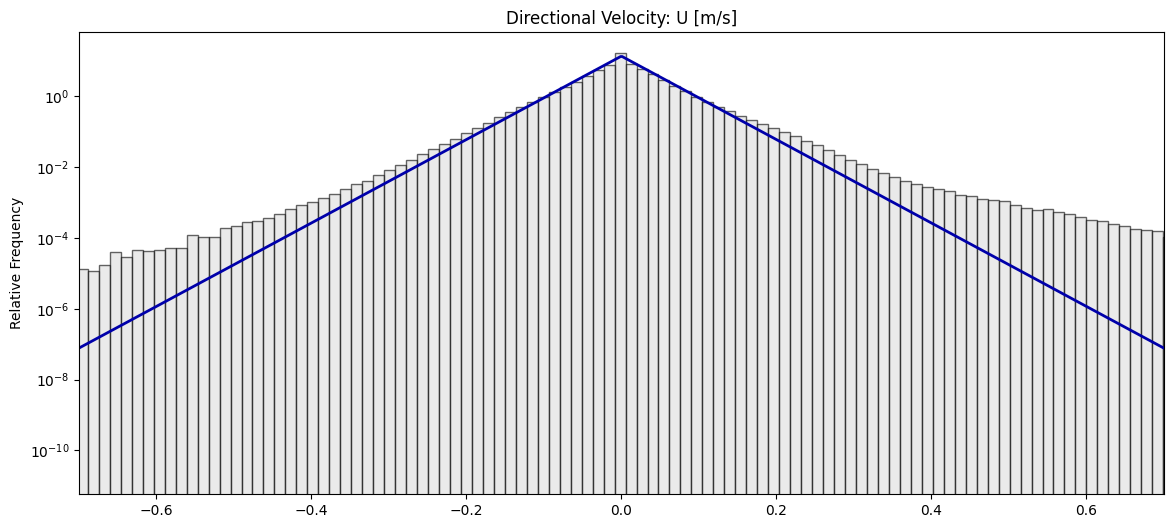

In [113]:
from scipy.stats import describe
from scipy.stats import laplace
import numpy as np
stats=describe(uvels)
print(stats)

loc,scale = laplace.fit(vvels) #temperature distribution in this case followed a Laplacian distribution, may vary based on distribution of parameters
x = np.linspace(-1,1,1000)
pdf = laplace.pdf(x, loc=loc, scale=scale)

plt.figure(figsize=(14,6))
plt.title('Directional Velocity: U [m/s]')
plt.ylabel('Relative Frequency')
plt.xlim(-0.7,0.7)
plt.plot(x,pdf,linewidth=2,color='#0000AA')
plt.hist(uvels,bins=140,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.yscale('log')
plt.savefig('uvels.png',dpi=300)

### Plot v-velocity distribution

DescribeResult(nobs=36448650, minmax=(np.float32(-0.8020397), np.float32(1.1210389)), mean=np.float32(-1.554927e-05), variance=np.float64(0.0031801265139909814), skewness=np.float64(0.3788392245769501), kurtosis=np.float32(6.3413773))


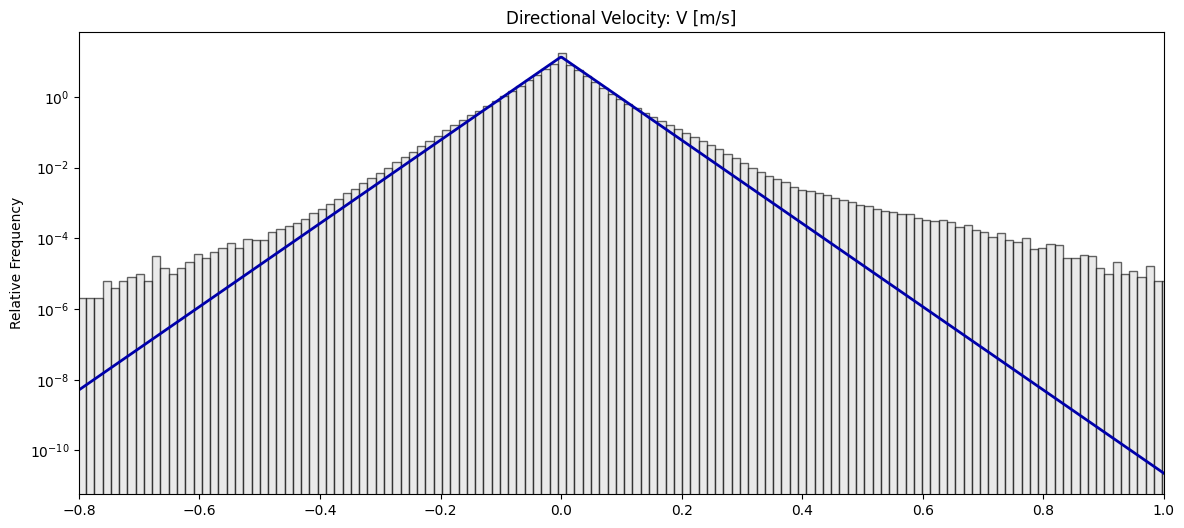

In [111]:
from scipy.stats import describe
from scipy.stats import laplace
from scipy.stats import t

import numpy as np
stats=describe(vvels)
print(stats)

loc,scale = laplace.fit(vvels)
#df, loc, scale = t.fit(vvels) #student's t-distribution may be an alternative good fit
x = np.linspace(-1,1,1000)
pdf = laplace.pdf(x, loc=loc, scale=scale)
#pdf = t.pdf(x,df=df,loc=loc,scale=scale)


plt.figure(figsize=(14,6))
plt.title('Directional Velocity: V [m/s]')
plt.ylabel('Relative Frequency')
plt.xlim(-0.8,1)
plt.plot(x,pdf,linewidth=2,color='#0000AA')
plt.hist(vvels,bins=140,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.yscale('log')
plt.savefig('vvels.png',dpi=300)

### Plot distribution of w-velocities

DescribeResult(nobs=36448650, minmax=(np.float32(-1.2483069), np.float32(1.0748019)), mean=np.float32(-0.0046654595), variance=np.float64(0.004229562938771039), skewness=np.float64(-1.4063756465911865), kurtosis=np.float32(10.478406))


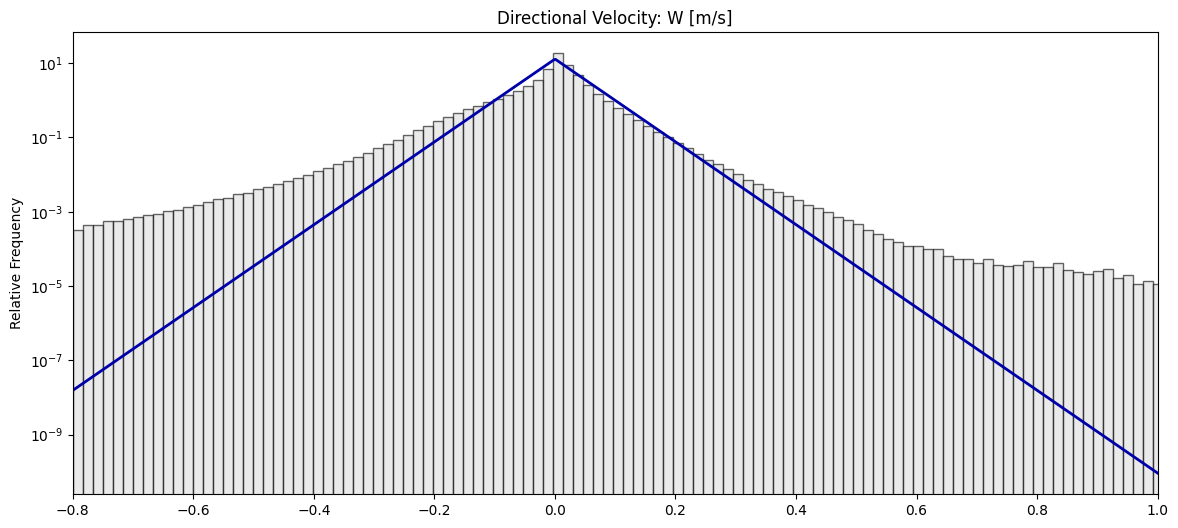

In [115]:
from scipy.stats import describe
from scipy.stats import laplace

import numpy as np
stats=describe(wvels)
print(stats)

loc,scale = laplace.fit(wvels)
x = np.linspace(-1,1,1000)
pdf = laplace.pdf(x, loc=loc, scale=scale)

plt.figure(figsize=(14,6))
plt.title('Directional Velocity: W [m/s]')
plt.ylabel('Relative Frequency')
plt.xlim(-0.8,1)
plt.plot(x,pdf,linewidth=2,color='#0000AA')
plt.hist(wvels,bins=140,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.yscale('log')
plt.savefig('wvels.png',dpi=300)

### Plot distribution of 3D velocity

DescribeResult(nobs=36448650, minmax=(np.float32(0.0), np.float32(1.3811722)), mean=np.float32(0.08971944), variance=np.float64(0.004734813831265099), skewness=np.float64(1.9868274927139282), kurtosis=np.float32(8.263375))


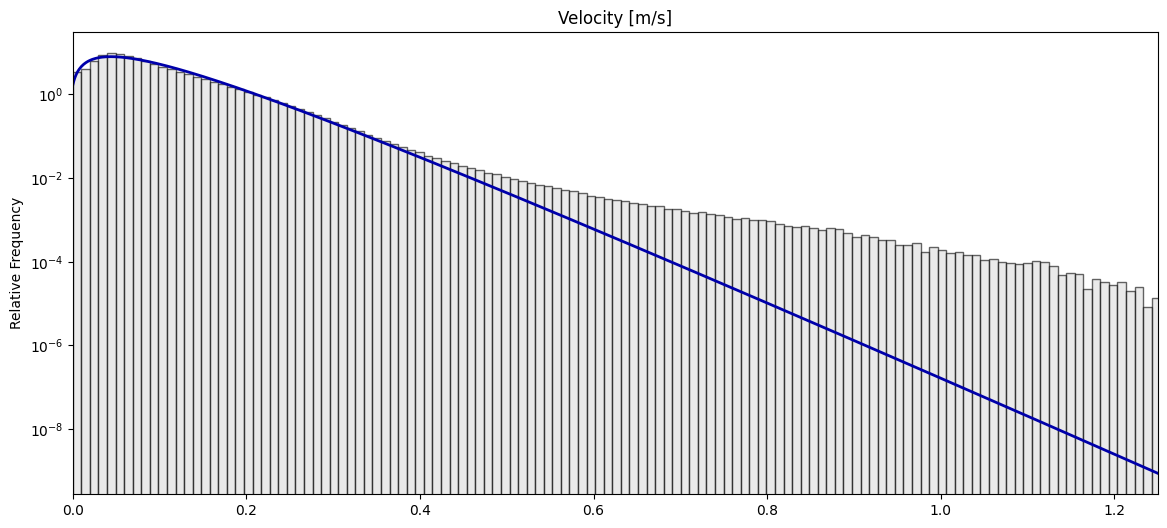

In [127]:
#3D velocity is only positive, and follows a heavy-tailed distribution
from scipy.stats import describe
from scipy.stats import gamma

import numpy as np
stats=describe(velocities)
print(stats)

shape, loc, scale = gamma.fit(velocities) # some distributions may fit better compared to Gamma
x = np.linspace(0,1.25,1000)
pdf = gamma.pdf(x,a=shape,loc=loc,scale=scale)

plt.figure(figsize=(14,6))
plt.title('Velocity [m/s]')
plt.ylabel('Relative Frequency')
plt.xlim(0,1.25)
plt.plot(x,pdf,linewidth=2,color='#0000AA')
plt.hist(velocities,bins=140,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.yscale('log')
plt.savefig('velocities.png',dpi=300)

### Temperature Distribution Across Room Height, based on case type (data preparation for plotting only)

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


KeyboardInterrupt: 

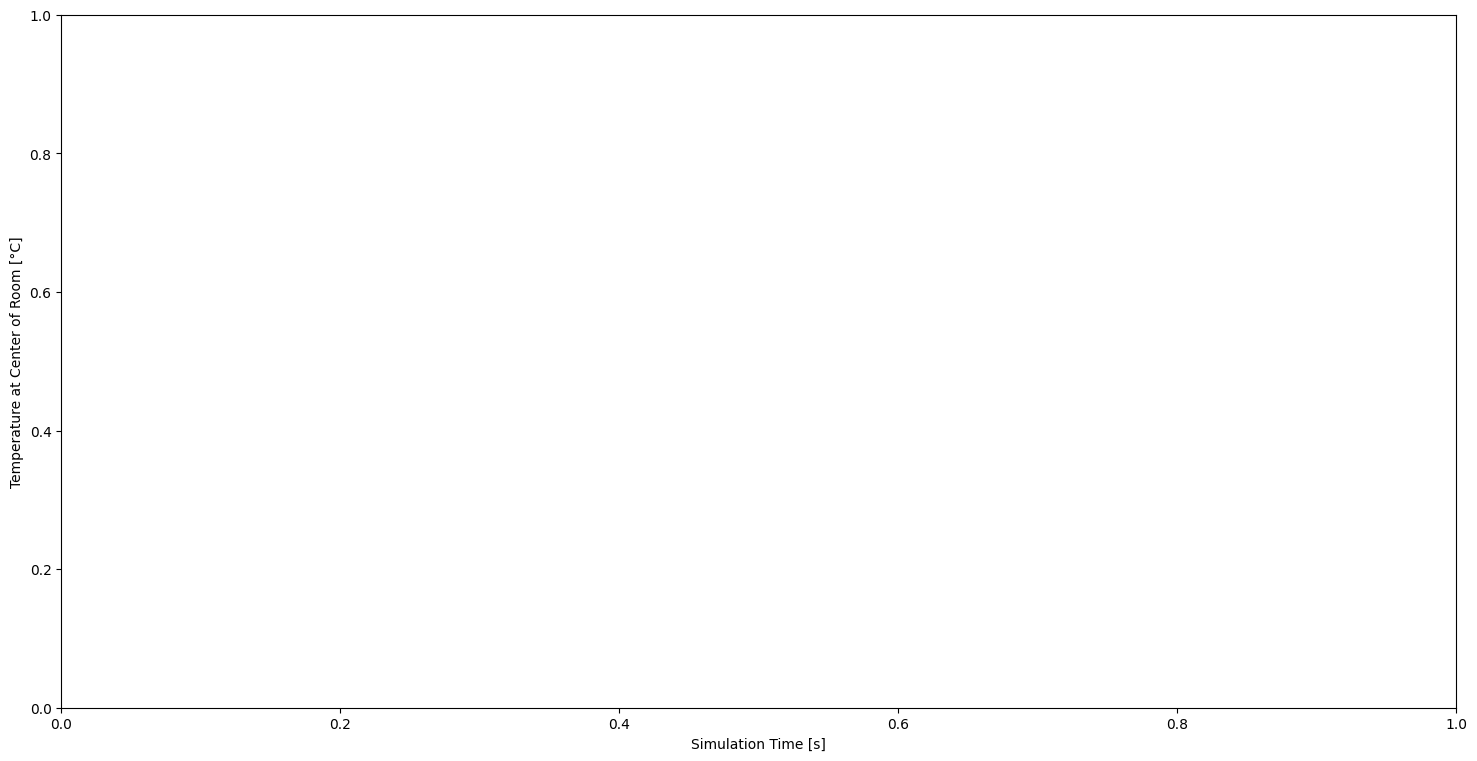

In [205]:
#temperature distribution at t: {0,300,600}: by case
plt.figure(figsize=(18,9))
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30m = []
temps_30i = []
tempgrad_i = []
tempgrad_m = []
tempgrad_f = []
#vel_i = []
#vel_m = []
#vel_f = []

#vel_i_ls = []
#vel_m_ls = []
#vel_f_ls = []
#vel_i_c = []
vel_i_v = []
#vel_m_c = []
vel_m_v = []
#vel_f_c = []
vel_f_v = []
for k in range(28):
    for i in runs_list:
        row = data[data['CHID']==i]
        case = row['Vent Type'].iloc[0]
        if case == 'Louvered': #done: swirl, linear, louvered square
            sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
        else:
            continue
        xmid = max(sim.meshes[0][0])
        ymid = max(sim.meshes[0][1])
        xint = int(xmid*10)
        yint = int(ymid*10)
        zmid = max(sim.meshes[0][2])
        zmidint = int(zmid*10)

        for l in range(ymidint):
            for m in range(xmidint):
                temps_30i.append((sim.slices[0][0].data[0,m,l,k]))
                temps_30m.append((sim.slices[0][0].data[5,m,l,k]))
                temps_30f.append((sim.slices[0][0].data[20,m,l,k]))
        tempgrad_i.append(sum(temps_30i)/len(temps_30i))
        tempgrad_m.append(sum(temps_30m)/len(temps_30m))
        tempgrad_f.append(sum(temps_30f)/len(temps_30f))
        temps_30i = []
        temps_30m = []
        temps_30f = []
    vel_i_v.append(sum(tempgrad_i)/len(tempgrad_i))
    vel_m_v.append(sum(tempgrad_m)/len(tempgrad_m))
    vel_f_v.append(sum(tempgrad_f)/len(tempgrad_f))
    tempgrad_i = []
    tempgrad_m = []
    tempgrad_f = []

### Plot mean velocity at specified room heights, aggregated by case

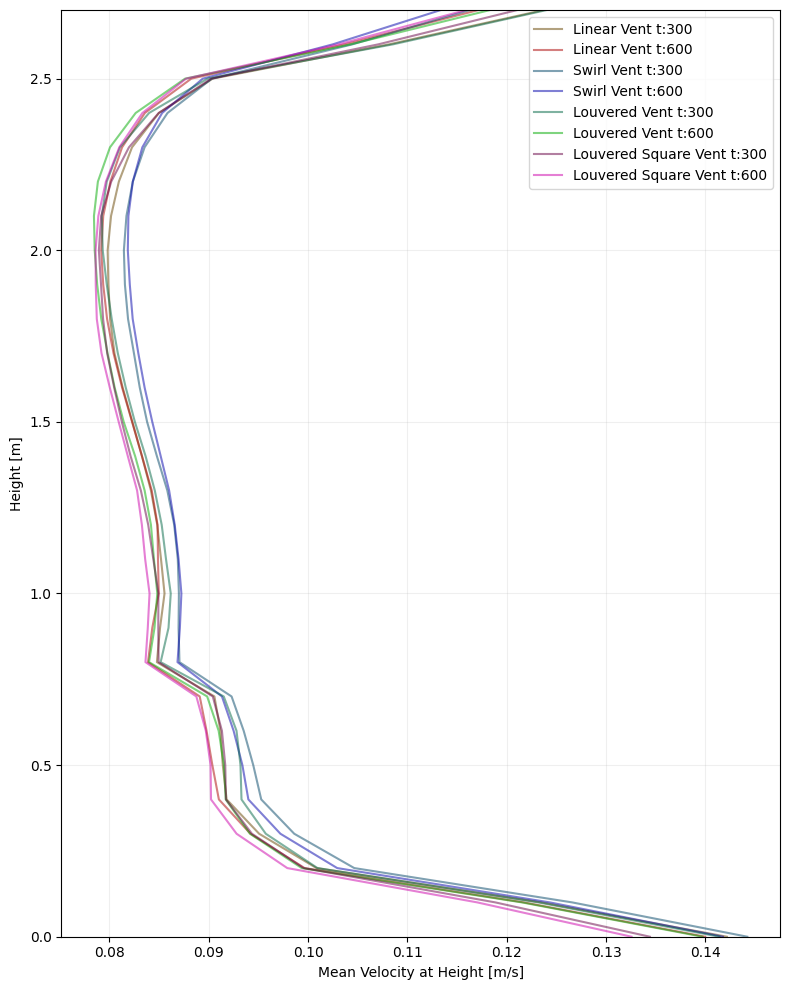

In [204]:
## Cases are aggregated manually

heights = []
for i in range(28):
    heights.append(i/10)

plt.figure(figsize=(8,10))
plt.xlabel('Mean Velocity at Height [m/s]')
plt.grid(alpha=0.2)
#plt.xlim(26,31)
plt.ylim(0,2.7)
plt.ylabel('Height [m]')
#heating:with forced air:linear vent
#plt.plot(vel_i,heights,label='Linear Vent t:0',color="#440000",alpha=0.5,linewidth=1.5)
plt.plot(vel_m,heights,label='Linear Vent t:300',color="#664400",alpha=0.5,linewidth=1.5)
plt.plot(vel_f,heights,label='Linear Vent t:600',color="#AA0000",alpha=0.5,linewidth=1.5)

#cooling:with radiator:swirl vent
#plt.plot(vel_i_c,heights,label='Swirl Vent t:0',color="#000044",alpha=0.5,linewidth=1.5)
plt.plot(vel_m_c,heights,label='Swirl Vent t:300',color="#004466",alpha=0.5,linewidth=1.5)
plt.plot(vel_f_c,heights,label='Swirl Vent t:600',color="#0000AA",alpha=0.5,linewidth=1.5)

#ventilation:with floor heating:louvered vent
#plt.plot(vel_i_v,heights,label='Louvered Vent t:0',color="#004400",alpha=0.5,linewidth=1.5)
plt.plot(vel_m_v,heights,label='Ventilation t:300',color="#006644",alpha=0.5,linewidth=1.5)
plt.plot(vel_f_v,heights,label='Ventilation t:600',color="#00AA00",alpha=0.5,linewidth=1.5)

#louvered square vent
#plt.plot(vel_i_ls,heights,label='Louvered Square Vent t:0',color="#004400",alpha=0.5,linewidth=1.5)
plt.plot(vel_m_ls,heights,label='Louvered Square Vent t:300',color="#660044",alpha=0.5,linewidth=1.5)
plt.plot(vel_f_ls,heights,label='Louvered Square Vent t:600',color="#CC00AA",alpha=0.5,linewidth=1.5)

plt.legend()
plt.tight_layout()
plt.savefig('vel_strat_h.png',dpi=300)

### Velocity Carpet Plot X-Y

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


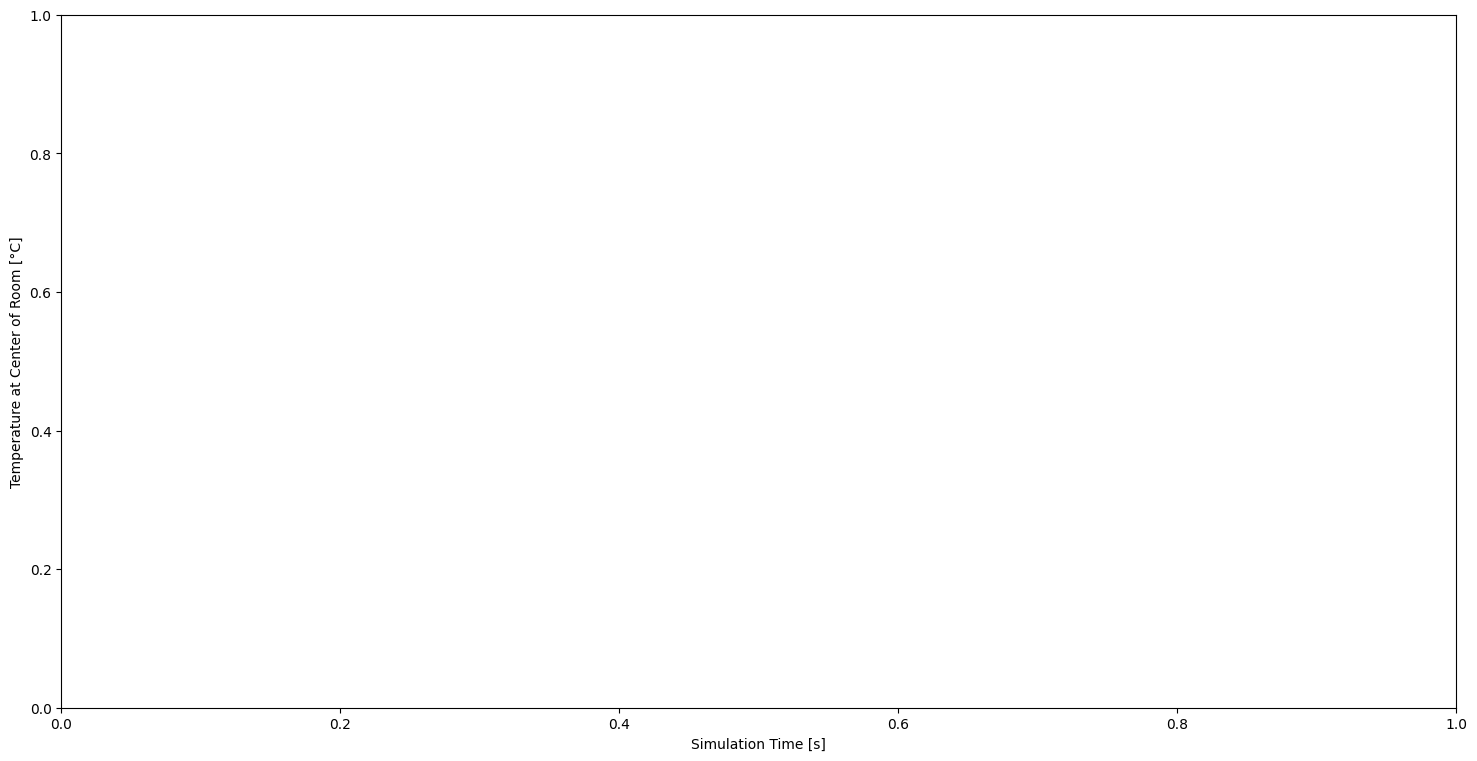

In [221]:
#temperature distribution at t: {0,300,600}: by case

plt.figure(figsize=(18,9))
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30m = []
temps_30i = []
tempgrad_i = []
tempgrad_m = []
tempgrad_f = []
#vel_i = []
#vel_m = []
#vel_f = []

#vel_i_ls = []
#vel_m_ls = []
#vel_f_ls = []
#vel_i_c = []
#vel_i_v = []
#vel_m_c = []
vel_m_v = np.zeros((60,len(runs_list))) #define resolution of plot and create array
#vel_f_c = []
vel_f_v = np.zeros((60,len(runs_list)))

for l in range(60): #yint
    for m in range(60): #xint
        for i in runs_list:
            row = data[data['CHID']==i]
            case = row['Vent Type'].iloc[0]
            sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
            xmid = max(sim.meshes[0][0])
            ymid = max(sim.meshes[0][1])
            xint = int(xmid*10)
            yint = int(ymid*10)
            zmid = max(sim.meshes[0][2])
            zint = int(zmid*10)
            xval = int(m/60*xint)
            yval = int(l/60*yint)
            for k in range(zint):
                temps_30m.append((sim.slices[0][0].data[5,xval,yval,k])) 
                temps_30f.append((sim.slices[0][0].data[20,xval,yval,k]))
        vel_m_v[l][m] = (sum(temps_30m)/len(temps_30m)) #quantities are interpolated to fit the array resolution
        vel_f_v[l][m] = (sum(temps_30f)/len(temps_30f))
        temps_30m = []
        temps_30f = []

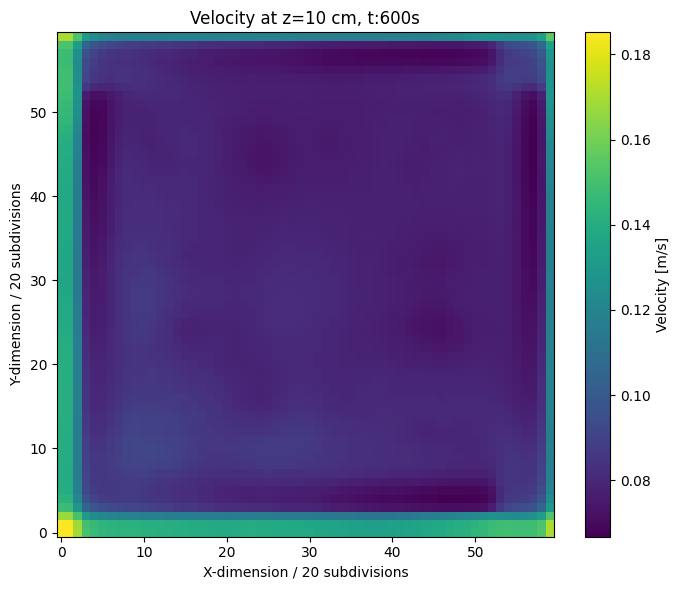

In [229]:
data_20x20 = vel_f_v[:60, :60] #plot data at t:600

# Create x and y coordinates for the grid
x = np.arange(0, 60, 1)  # x-coordinates (0 to 59)
y = np.arange(0, 60, 1)  # y-coordinates (0 to 59)
X, Y = np.meshgrid(x, y)

# Plot using pcolormesh
plt.figure(figsize=(7,6))
plt.pcolormesh(X, Y, data_20x20, cmap='viridis', shading='auto')
plt.colorbar(label='Velocity [m/s]')  # Add legend
plt.title('Velocity at z=10 cm, t:600s')
plt.xlabel('X-dimension / 20 subdivisions')
plt.ylabel('Y-dimension / 20 subdivisions')
plt.tight_layout()
plt.savefig('carpetplot_600s.png',dpi=300)

# Temperature Distribution

In [136]:
## import attributes dataframe
import pandas as pd
import numpy as np

data = pd.read_csv(r'fds_data_summary_with_wall_tmp_front.csv')

print(data.head())

   CHID  TMPA  Floor Heating  Radiator  Supply TMP_FRONT  Wall TMP_FRONT  \
0     0  21.0          False     False              35.0       17.389502   
1     1  20.0           True     False              35.0       16.861541   
2    10  16.0           True     False              35.0       12.412362   
3   100  27.0          False     False              12.0       27.595830   
4  1000  16.0          False     False              35.0       13.949277   

  Case Type Heating System  
0   Heating     Forced Air  
1   Heating  Floor Heating  
2   Heating  Floor Heating  
3   Cooling            NaN  
4   Heating     Forced Air  


d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


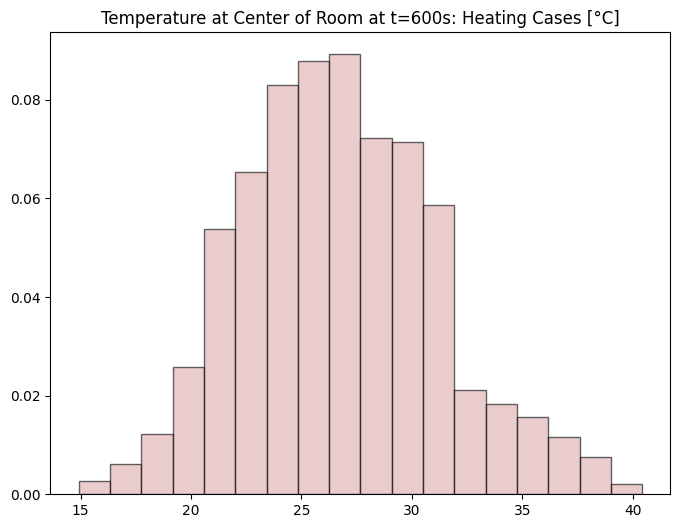

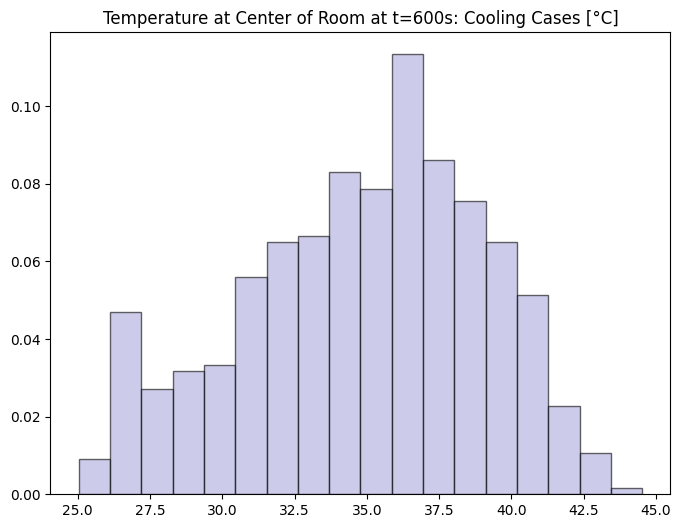

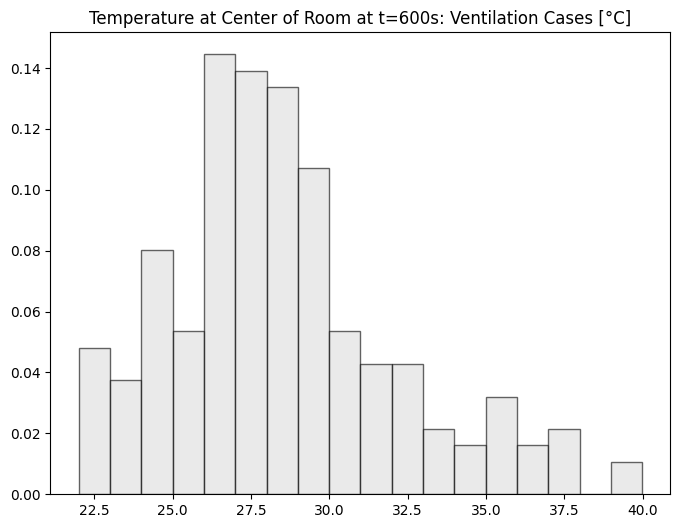

In [148]:
#temperature distribution at t:600 based on case type

temps_30h = []
temps_30c = []
temps_30v = []
temph_f = []
for i in runs_list:
    row = data[data['CHID']==i]
    case = row['Case Type'].iloc[0]
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    xmid = max(sim.meshes[0][0])/2
    ymid = max(sim.meshes[0][1])/2
    xint = int(xmid*10)
    yint = int(ymid*10)
    zmid = max(sim.meshes[0][2])/2
    zmidint = int(zmid*10)
    if case == 'Heating':
        temps_30f.append((sim.slices[1][0].data[20,xmidint,ymidint,zmidint]))
    if case == 'Cooling':
        temps_30c.append((sim.slices[1][0].data[20,xmidint,ymidint,zmidint]))
    if case == 'Ventilation':
        temps_30v.append((sim.slices[1][0].data[20,xmidint,ymidint,zmidint]))

#Final temperature distribution
plt.figure(figsize=(8,6))
plt.title('Temperature at Center of Room at t=600s: Heating Cases [°C]')
plt.hist(temps_30f,bins=18,density=True, alpha=0.6, color='#DDAAAA', edgecolor='black')
plt.savefig('temp600s_heating.png',dpi=300)

plt.figure(figsize=(8,6))
plt.title('Temperature at Center of Room at t=600s: Cooling Cases [°C]')
plt.hist(temps_30c,bins=18,density=True, alpha=0.6, color='#AAAADD', edgecolor='black')
plt.savefig('temp600s_cooling.png',dpi=300)

plt.figure(figsize=(8,6))
plt.title('Temperature at Center of Room at t=600s: Ventilation Cases [°C]')
plt.hist(temps_30v,bins=18,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.savefig('temp600s_ventilation.png',dpi=300)

### Distribution Curve Fitting

DescribeResult(nobs=1833, minmax=(np.float32(14.76827), np.float32(44.58422)), mean=np.float32(29.626522), variance=np.float64(32.0564671020841), skewness=np.float64(0.18866702914237976), kurtosis=np.float32(-0.6901636))


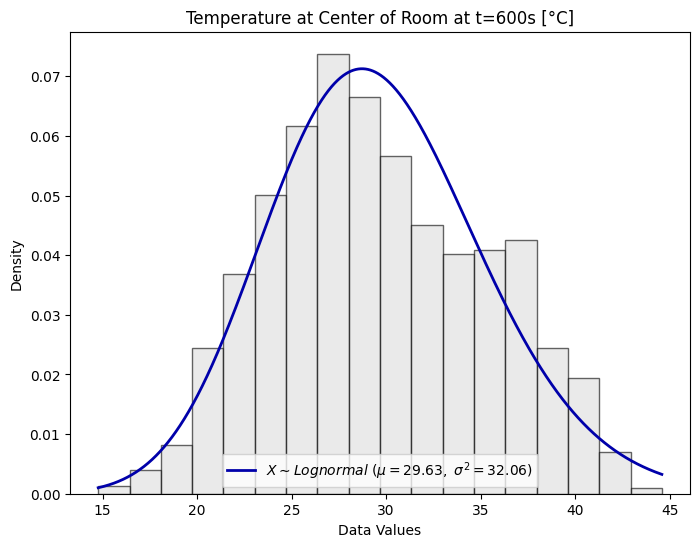

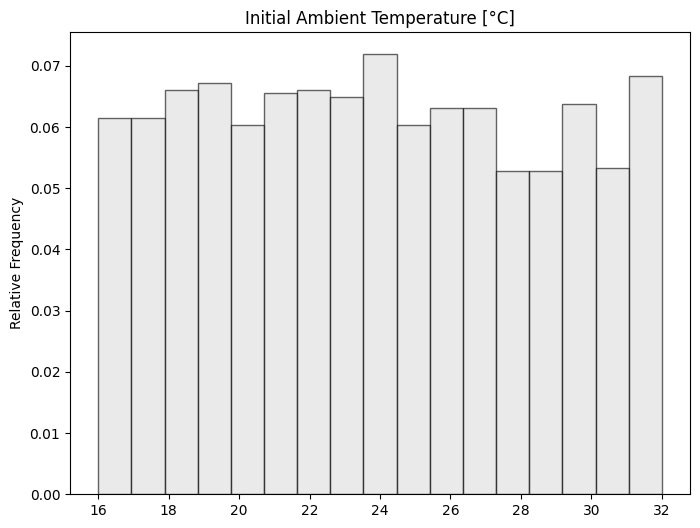

In [23]:
import numpy as np
from scipy.stats import lognorm
from scipy.stats import describe

#Final temperature distribution
plt.figure(figsize=(8,6))
plt.title('Temperature at Center of Room at t=600s [°C]')
plt.hist(temps_30f,bins=18,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')

# Fit a lognormal distribution
shape, loc, scale = lognorm.fit(temps_30f)
x = np.linspace(min(temps_30f), max(temps_30f), 1833)
pdf = lognorm.pdf(x, shape, loc, scale)
stats = describe(temps_30f)

# Plot the histogram and the lognormal PDF
plt.plot(x, pdf, color='#0000AA', linewidth=2, label='$X \sim Lognormal \ (\mu=$'+str(round(stats[2],2))+'$,\ \sigma^2=$'+str(round(stats[3],2))+'$)$')
print(stats)
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.savefig('temp600s.png',dpi=300)

#initial temperature distribution
plt.figure(figsize=(8,6))
plt.title('Initial Ambient Temperature [°C]')
plt.ylabel('Relative Frequency')
plt.hist(temps_30i,bins=17,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.savefig('temp0.png',dpi=300)

### Initial vs. Final Temperature: Distribution

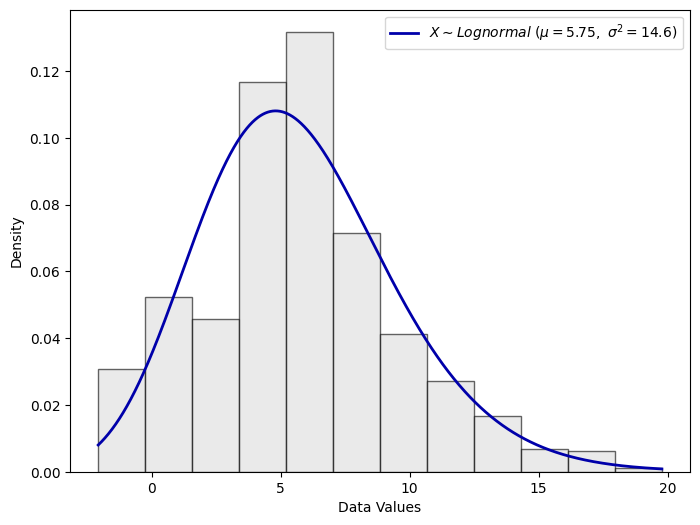

In [7]:
#temp. difference between t=0 and t=600
tdiff = []
for i in range(len(temps_30f)):
    tdiff.append(temps_30f[i]-temps_30i[i])

#distribution of temperature difference
plt.figure(figsize=(8,6))
plt.hist(tdiff,bins=12,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')

#lognormal distribution
shape, loc, scale = lognorm.fit(tdiff)
x = np.linspace(min(tdiff), max(tdiff), 1833)
pdf = lognorm.pdf(x, shape, loc, scale)
stats2 = describe(tdiff)

# Plot the histogram and the lognormal PDF
plt.plot(x, pdf, color='#0000AA', linewidth=2, label='$X \sim Lognormal \ (\mu=$'+str(round(stats2[2],2))+'$,\ \sigma^2=$'+str(round(stats2[3],2))+'$)$')

plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()

plt.savefig('tempdiff.png',dpi=300)

In [ ]:
sim.obstructions

ID: OBST-1; has data: False
ID: OBST-2; has data: False
ID: OBST-3; has data: False
ID: OBST-4; has data: False
ID: OBST-5; has data: False
ID: OBST-6; has data: False
ID: OBST-7; has data: False
ID: OBST-8; has data: False
ID: OBST-9; has data: False
ID: OBST-10; has data: False
ID: OBST-11; has data: False
ID: OBST-12; has data: False
ID: OBST-13; has data: False
ID: OBST-14; has data: False
ID: OBST-15; has data: False
ID: OBST-16; has data: False
ID: OBST-17; has data: False
ID: OBST-18; has data: False


# Heat gains due to occupants and devices

In [1]:
import math
#calculates heat release of occupants and devices at given temperature and temperature difference with ambient
#refer to documentation for calculation process
#computer, 30*20*10 cm
L = 0.3
L2 = 0.2
T_a = 16
T_s = T_a+1
delta_t = T_a-T_s

Ra = 2*9.81*abs(delta_t)*L**3/(T_a+T_s)/2.16e-5/2.131e-5
Ra_short = 2*9.81*abs(delta_t)*L2**3/(T_a+T_s)/2.16e-5/2.131e-5
Nu_vert = (0.825+0.324*Ra**(1/6))**2
Nu_short = (0.825+0.324*Ra_short**(1/6))**2
Nu_plate = 0.15*Ra**(1/3)

q_plate = 0.0257/L*Nu_plate*delta_t
q_vert = 0.0257/L*Nu_vert*delta_t
q_short = 0.0257/L2*Nu_short*delta_t
q_total = q_plate+2*q_vert+2*q_short

<>:31: SyntaxWarning: invalid escape sequence '\ '
<>:31: SyntaxWarning: invalid escape sequence '\ '
/var/folders/7y/d40s_s1129b861kk9hxxws140000gn/T/ipykernel_1145/3012159869.py:31: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$T_{ambient}\ [°C]$')


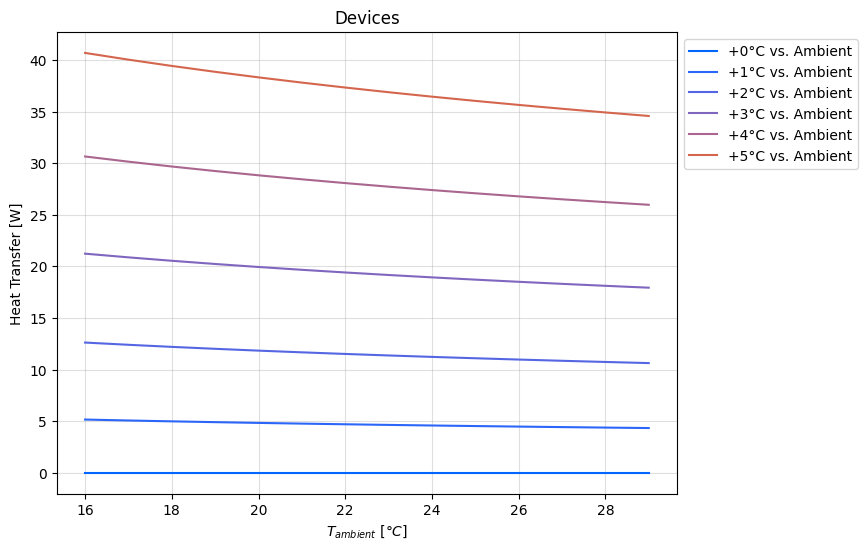

In [92]:
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Devices')
#computer, 30*20*10 cm
L = 0.3
L2 = 0.2
T_a = 16
T_s = T_a+1

qtot = []
for d in range(6):
    qtot = []
    tamb = []
    for T_a in range(16,30):
        T_s = T_a+d
        tamb.append(T_a)
        delta_t = T_a-T_s
        Ra = 2*9.81*abs(delta_t)*L**3/(T_a+T_s)/2.16e-5/2.131e-5
        Ra_short = 2*9.81*abs(delta_t)*L2**3/(T_a+T_s)/2.16e-5/2.131e-5
        Nu_vert = (0.825+0.324*Ra**(1/6))**2
        Nu_short = (0.825+0.324*Ra_short**(1/6))**2
        Nu_plate = 0.15*Ra**(1/3)

        q_plate = 0.0257/1*Nu_plate*delta_t
        q_vert = 0.0257/1*Nu_vert*delta_t
        q_short = 0.0257/1*Nu_short*delta_t
        q_total = q_plate+2*q_vert+2*q_short
        qtot.append(-q_total)
    plt.plot(tamb,qtot,color = ((d/6),0.4,1-(d/6)**2),label = '+'+str(d)+'°C vs. Ambient')
plt.xlabel('$T_{ambient}\ [°C]$')
plt.ylabel('Heat Transfer [W]')
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('computershr.png',dpi=300,bbox_inches='tight')

<>:30: SyntaxWarning: invalid escape sequence '\ '
<>:30: SyntaxWarning: invalid escape sequence '\ '
/var/folders/7y/d40s_s1129b861kk9hxxws140000gn/T/ipykernel_1145/2644334201.py:30: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$T_{ambient}\ [°C]$')


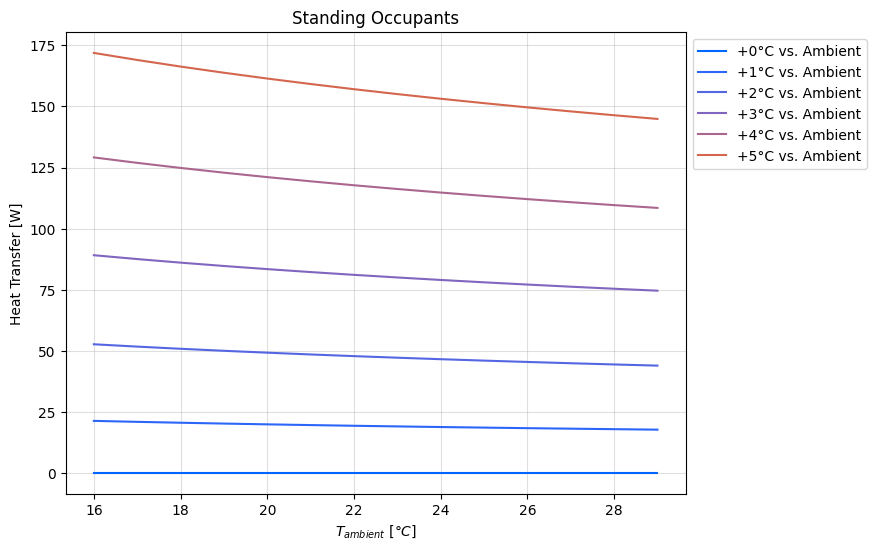

In [93]:
import math
#occupant, 0.2*0.4*1.7 m
plt.figure(figsize=(8,6))
plt.title('Standing Occupants')
L = 1.7
L2 = 0.4
T_a = 16
T_s = T_a+1

qtot_h = []
for d in range(6):
    qtot_h = []
    tamb = []
    for T_a in range(16,30):
        tamb.append(T_a)
        T_s = T_a+d
        delta_t = T_a-T_s
        Ra = 2*9.81*abs(delta_t)*L**3/(T_a+T_s)/2.16e-5/2.131e-5
        Ra_short = 2*9.81*abs(delta_t)*L2**3/(T_a+T_s)/2.16e-5/2.131e-5
        Nu_vert = (0.825+0.324*Ra**(1/6))**2
        Nu_short = (0.825+0.324*Ra_short**(1/6))**2
        Nu_plate = 0.15*Ra**(1/3)

        q_plate = 0.0257/1*Nu_plate*delta_t
        q_vert = 0.0257/1*Nu_vert*delta_t
        q_short = 0.0257/1*Nu_short*delta_t
        q_total = q_plate+2*q_vert+2*q_short
        qtot_h.append(-q_total)
    plt.plot(tamb,qtot_h,color = ((d/6),0.4,1-(d/6)**2),label = '+'+str(d)+'°C vs. Ambient')
plt.xlabel('$T_{ambient}\ [°C]$')
plt.ylabel('Heat Transfer [W]')
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('occupantshr.png',dpi=300,bbox_inches='tight')

<>:31: SyntaxWarning: invalid escape sequence '\ '
<>:31: SyntaxWarning: invalid escape sequence '\ '
/var/folders/7y/d40s_s1129b861kk9hxxws140000gn/T/ipykernel_1145/2808304406.py:31: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$T_{ambient}\ [°C]$')


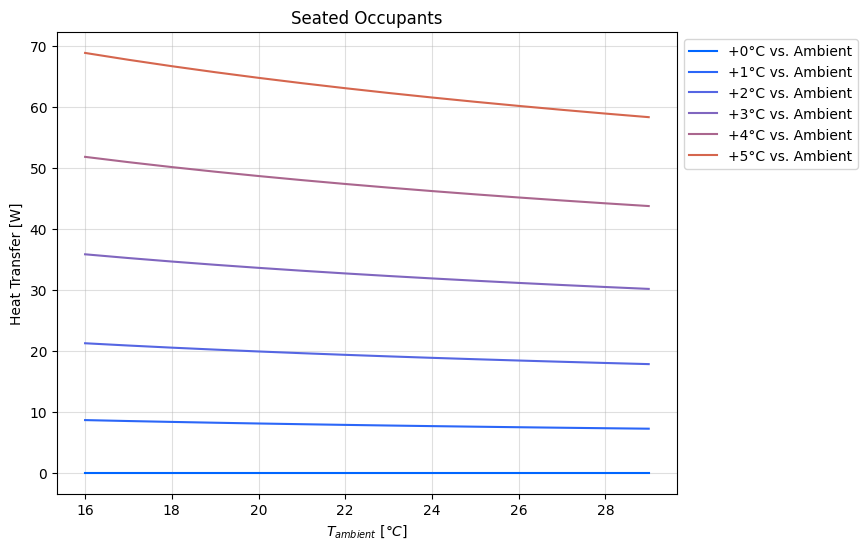

In [94]:
import math
#seated occupant, 0.2*0.4*0.5 m
plt.figure(figsize=(8,6))
plt.title('Seated Occupants')
L = 0.5
L2 = 0.4
T_a = 16
T_s = T_a+1

qtot_s = []

for d in range(6):
    qtot_s = []
    tamb = []
    for T_a in range(16,30):
        T_s = T_a+d
        tamb.append(T_a)
        delta_t = T_a-T_s
        Ra = 2*9.81*abs(delta_t)*L**3/(T_a+T_s)/2.16e-5/2.131e-5
        Ra_short = 2*9.81*abs(delta_t)*L2**3/(T_a+T_s)/2.16e-5/2.131e-5
        Nu_vert = (0.825+0.324*Ra**(1/6))**2
        Nu_short = (0.825+0.324*Ra_short**(1/6))**2
        Nu_plate = 0.15*Ra**(1/3)

        q_plate = 0.0257/1*Nu_plate*delta_t
        q_vert = 0.0257/1*Nu_vert*delta_t
        q_short = 0.0257/1*Nu_short*delta_t
        q_total = q_plate+2*q_vert+2*q_short
        qtot_s.append(-q_total)
    plt.plot(tamb,qtot_s,color = ((d/6),0.4,1-(d/6)**2),label = '+'+str(d)+'°C vs. Ambient')
plt.xlabel('$T_{ambient}\ [°C]$')
plt.ylabel('Heat Transfer [W]')
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('occupantssthr.png',dpi=300,bbox_inches='tight')